# Witful ML 06 - Classification Model Evaluation
by Kaan Kabalak, Editor In Chief @ witfuldata.com

# Introduction

In this chapter of Witful ML, we will see how we can evlauate our classification models in a detailed manner. 

# The Data Frame

In [1]:
#Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [2]:
#Form a data frame
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df = diabetes_df.astype(float)
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [3]:
diabetes_df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

# The Model

In [4]:
#X-y variables
X = diabetes_df.drop("Outcome",axis=1).values
y = diabetes_df["Outcome"].values
#Instantiate
k_model = KNeighborsClassifier(n_neighbors=3)
#Fit
k_model.fit(X,y)
#Predict
pred_y = k_model.predict(X)

# Evaluation & Visualization

In [5]:
#Print the accuracy score
print(accuracy_score(y,pred_y))

0.859375


Accuracy score gives us an idea about how well our model performed, but there are other metrics which can help us better in particular situations. For example, if there is an imbalance between class observations (%90 of data belongs to one class, the rest belongs to another), it wouldn't be right to rely only on accuracy. We cannot rely on accuracy because the model would still be %90 accurate if it completely ignored the second class. So, what do we need?

We should be able to see how well our model performed on predicting the classes from different aspects. The confusion matrix and classification reports help us better understand our model's performance. 

## Confusion Matrix

In [6]:
#Print the confusion matrix
print(confusion_matrix(y,pred_y))

[[459  41]
 [ 67 201]]


The visualization below will help you better understand what this matrix actually means.

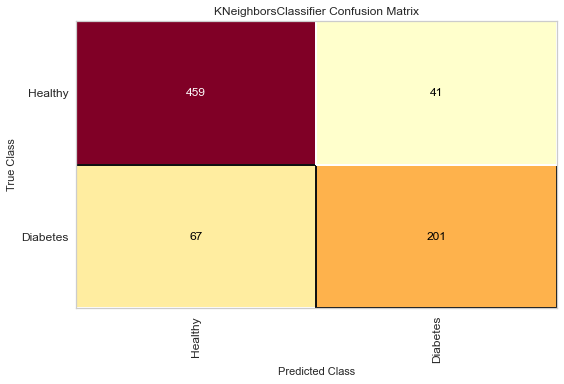

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
#Visualize the confusion matrix
confusion_visualizer = ConfusionMatrix(k_model, classes = ["Healthy","Diabetes"])
confusion_visualizer.fit(X,y)
confusion_visualizer.score(X,y)
confusion_visualizer.show()

True classes are counted from left to right. The predicted classes are counted from bottom to up. This means that there are 500 "Healthy" and 268 "Diabetes" observations.

The numbers on the blocks stand for the number of times when predicted classes overlapped with true classes. From this visualization, we can tell that the predicted "healthy" class overlapped with the true "healthy" class 459 times. This means that our model correctly predicted the class of 459 healthy observations. 

We can also see that the predicted "healthy" class overlapped with the true "diabetes class 67 times. This means that our model made wrong predictions on 67 diabetes observations and predicted their class as "healthy" whereas it should have been "diabetes"

### Understanding True-False & Negative - Positive

In the context of classification models:

* True = Correctly prediction
* False = Wrong prediction
* Negative = The observation does not have a certain characteristic (in this case, it doesn't have diabetes)
* Positive = The observation has a certain characteristic (in this case, it has diabetes)

One mistake here would be to think that the terms "positive" and "negative" have something to do with the result being good or bad. To take your mind off thinking like this, you can think about COVID tests. A "positive" result means that you have COVID and a "negative" result means that you don't have it. This logic applies to various classification models where "positive" stands for a class which we would define as bad in our lives.

So what can we say about true-false predictions and negative-positive classes looking at the confusion matrix? Let's see:


There are 500 (459 + 41) observations which are "Healthy" (Negative)

There are 268 (201 + 67) observations which are "Diabetes" (Positive)

#### True Negatives

* The model labeled 459 of 500 "healthy" observations correctly. So, the number of True Negatives is 459

#### False Positives

* The model predicted 41 of them as "diabetes", whereas they should have been "Healthy". So, the number of False Positives is 41




#### True Positives

* The model labeled 201 diabetes observations correctly with "diabetes". So, the number of True Positives is 201

#### False Negatives

* The model predicted 67 of the "diabetes" observations as "healthy" So, the number of False Negatives is 67





## Classification Report

In [8]:
#Print the classification report
print(classification_report(y,pred_y,target_names=["Healthy","Diabetes"]))

              precision    recall  f1-score   support

     Healthy       0.87      0.92      0.89       500
    Diabetes       0.83      0.75      0.79       268

    accuracy                           0.86       768
   macro avg       0.85      0.83      0.84       768
weighted avg       0.86      0.86      0.86       768



 What are precision, recall, f1 and support? What are those macro and weighted averages?

#### Precision

It is calculated as follows : True Positives/(True Positives + False Positives). It displays model performance in terms of not labeling an observation positive which is in fact a negative one. 

#### Recall

It is calculated as follows : True Positives/(True Positives + False Negatives). It displays model performance in terms of finding all positive samples. In binary classifications like this one, recall of the positive class is known as “sensitivity”, whereas recall of the negative class is known as “specificity”.

#### F1 Score

It is calculated as follows : 2 * ((Precision + Recall)/(Precision * Recall)). It is known as the harmonic mean of precision and recall. 

#### Support 

It is the number of observations for each class.

#### Macro Average 

It is the average, calculated without taking the number of observations into consideration

#### Weighted Average

It is the average, calculated by taking the number of observations into consideration. 

### Important Note:

This classification report is calculated on a binary classification model which has one negative ("healthy") and one positive ("diabetes") class. If there is only one negative and positive class, why does the report show these scores (which are calculated through positive labels) for both the negative and positive class? 

The classification report has no way of knowing which classes we would define as "positive" and "negative". It calculates the scores by labeling one class positive and the other negative. Then, it calculates the scores again, this time by labeling the initially negative class as positive and the initially positive class as negative. This way we have all the results we need for all possible scenarios.

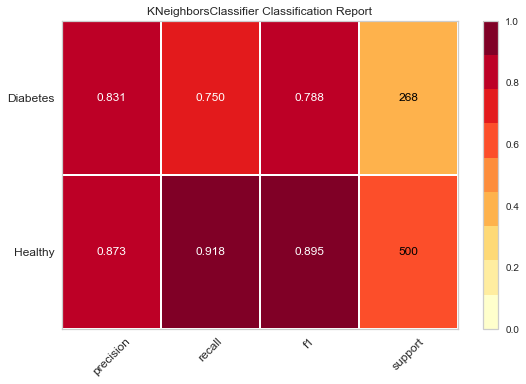

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [9]:
#Visualize the report
report_visualizer = ClassificationReport(k_model, classes=["Healthy","Diabetes"], support=True)

report_visualizer.fit(X,y)        
report_visualizer.score(X,y)    
report_visualizer.show()                